In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/captions.txt')

In [3]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
df.shape

(40455, 2)

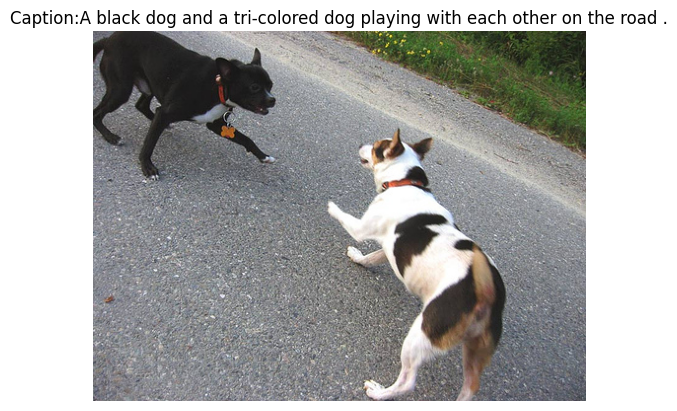

In [5]:
# Function to show image-caption example based on index 

def show_example(index):
    img_name = df.iloc[index]['image']
    caption = df.iloc[index]['caption']

    img_path = os.path.join("Data/Images", img_name)
    image = Image.open(img_path)

    plt.imshow(image)
    plt.title(f"Caption:{caption}")
    plt.axis("off")
    plt.show()

show_example(6)

In [6]:
# Checking the length of the captions

df['caption_len'] = df['caption'].apply(len)
df.head()

,image,caption,caption_len
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,72
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,37
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,48
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,52
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,57


In [7]:
# Checking to see if there are any captions with too less of a length

df[df.caption_len<10]

,image,caption,caption_len
9305,2428275562_4bde2bc5ea.jpg,A,1
11363,256085101_2c2617c5d0.jpg,Dog yawns,9
23226,3237760601_5334f3f3b5.jpg,A skier,7
33360,3640443200_b8066f37f6.jpg,a,1
34525,3694071771_ce760db4c7.jpg,a cyclist,9


In [11]:
import re 

def clean_caption(text):
    text = text.lower()
    
    # removes punctions/ keeps only texts
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing extra whitespaces
    text = " ".join(text.split())

    return text
    

In [12]:
df["caption_cleaned"] = df["caption"].apply(clean_caption)
df.head()

,image,caption,caption_len,caption_cleaned
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,72,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,37,a girl going into a wooden building
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,48,a little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,52,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,57,a little girl in a pink dress going into a woo...


In [13]:
import tiktoken

tokenizer = tiktoken.get_encoding("cl100k_base")

def tokenize_caption(text):
    text = f"<|startoftext|> {text} <|endoftext|>"
    tokens = tokenizer.encode(text, allowed_special={'<|startoftext|>', '<|endoftext|>'})
    return tokens

df['caption_tokenized'] = df['caption_cleaned'].apply(tokenize_caption)
df.head()

,image,caption,caption_len,caption_cleaned,caption_tokenized
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,72,a child in a pink dress is climbing up a set o...,"[27, 91, 2527, 14450, 428, 91, 29, 264, 1716, ..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,37,a girl going into a wooden building,"[27, 91, 2527, 14450, 428, 91, 29, 264, 3828, ..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,48,a little girl climbing into a wooden playhouse,"[27, 91, 2527, 14450, 428, 91, 29, 264, 2697, ..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,52,a little girl climbing the stairs to her playh...,"[27, 91, 2527, 14450, 428, 91, 29, 264, 2697, ..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,57,a little girl in a pink dress going into a woo...,"[27, 91, 2527, 14450, 428, 91, 29, 264, 2697, ..."


In [14]:
tokenizer.n_vocab

100277